### CS Training

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv('G:\My Research\CSV Files\cs-training.csv')
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
print('No. of rows:', df.shape[0])
print('No. of columns', df.shape[1])

No. of rows: 150000
No. of columns 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [5]:
# dropping the insignificant variables
df = df.drop(['ID','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate',
         'NumberOfTime60-89DaysPastDueNotWorse'], axis=1)

In [6]:
# calculating the % of classes in the target variable
df.SeriousDlqin2yrs.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

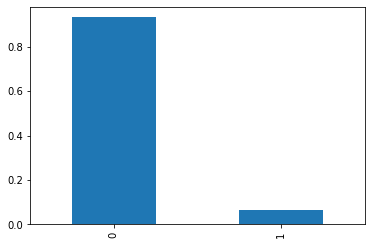

In [7]:
df.SeriousDlqin2yrs.value_counts(normalize=True).plot.bar()
plt.show()

Thus, we see classes are highly imbalanced.

### Data Cleaning

**Monthly Income Treatment**

In [8]:
df.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

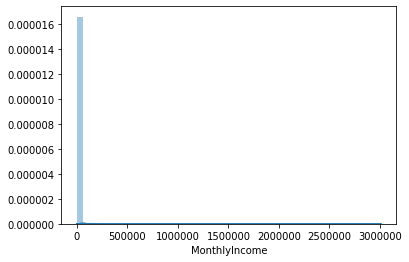

In [9]:
sns.distplot(df.MonthlyIncome.dropna())
plt.show()

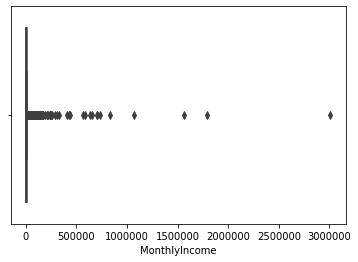

In [10]:
sns.boxplot(df.MonthlyIncome)
plt.show()

In [11]:
df.loc[df['MonthlyIncome']>15500, 'MonthlyIncome']= 15500
# For handling outliers at maximum level, we have capped the outliers to (q3+1.5iqr)

In [12]:
df.loc[df['MonthlyIncome']<1000, 'MonthlyIncome']=np.NaN

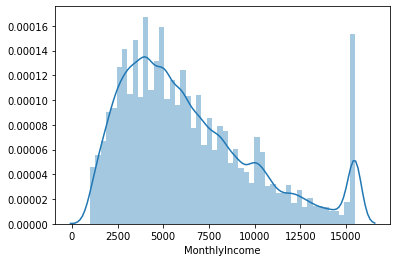

In [13]:
sns.distplot(df.MonthlyIncome.dropna())
plt.show()

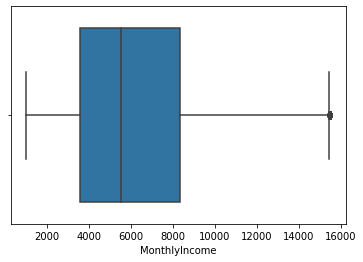

In [14]:
sns.boxplot(df.MonthlyIncome)
plt.show()

In [15]:
# filling the missing values with forward fill
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(method='ffill')

In [16]:
df.MonthlyIncome.isna().sum()

0

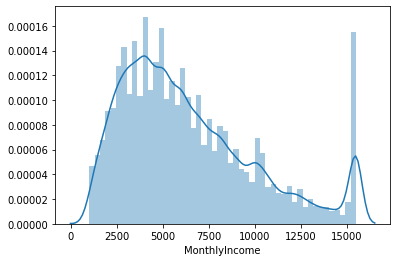

In [17]:
sns.distplot(df.MonthlyIncome)
plt.show()

**RevolvingUtilization of Unsecured Credit Lines**

In [18]:
df.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [19]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines']>1, 'RevolvingUtilizationOfUnsecuredLines']=np.NaN

RevolvingUtilizationOfUnsecuredLines more than 1 is not possible (such cases are not outliers).

Hence, we made such cases missing and imputed.

In [20]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill')

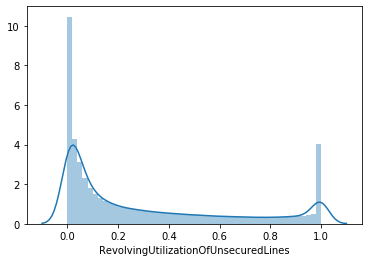

In [21]:
sns.distplot(df.RevolvingUtilizationOfUnsecuredLines)
plt.show()

**Age**

In [22]:
df.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [23]:
df.loc[(df['age']>80)|(df['age']<18), 'age']=np.NaN

In [24]:
df.age.describe()

count    145063.000000
mean         51.171663
std          13.665503
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

In [25]:
df['age'] = df['age'].fillna(method='ffill')

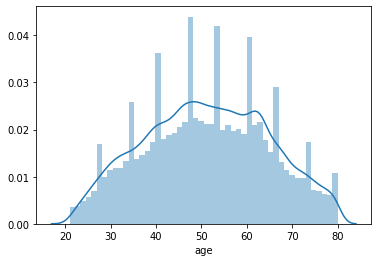

In [26]:
sns.distplot(df.age)
plt.show()

Spikes are due to some round figures filled, when the data was not present

**Debt Ratio**

In [27]:
df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [28]:
df.loc[df['DebtRatio']>1, 'DebtRatio']=np.NaN

In [29]:
df['DebtRatio'] = df['DebtRatio'].fillna(method='ffill')

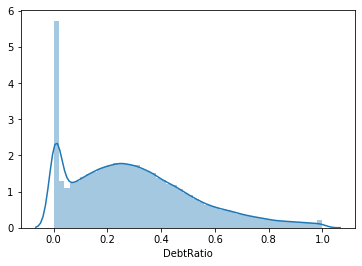

In [30]:
sns.distplot(df.DebtRatio)
plt.show()

**Number Of Dependents**

In [31]:
df.NumberOfDependents .describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [32]:
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(method='ffill')

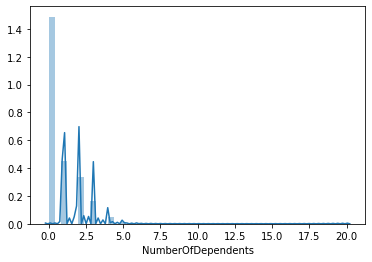

In [33]:
sns.distplot(df.NumberOfDependents)
plt.show()

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,0.303669,0.337852,0.0,0.028578,0.144257,0.520104,1.0
age,150000.0,51.170047,13.667271,21.0,41.000000,51.000000,62.000000,80.0
DebtRatio,150000.0,0.303109,0.226290,0.0,0.126122,0.274252,0.438325,1.0
MonthlyIncome,150000.0,6376.857593,3642.648085,1000.0,3600.000000,5500.000000,8333.000000,15500.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfDependents,150000.0,0.757247,1.115278,0.0,0.000000,0.000000,1.000000,20.0


### Exploratory Data Analysis

**Delinquency and monthly Income**

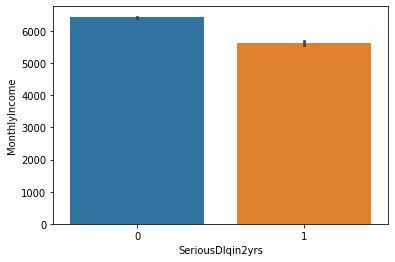

In [35]:
sns.barplot(x = 'SeriousDlqin2yrs', y='MonthlyIncome', data=df)
plt.show()

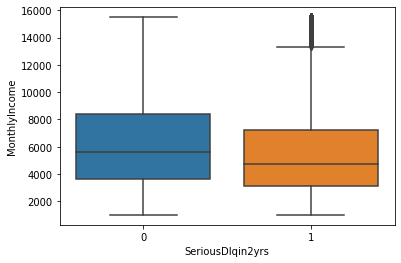

In [36]:
sns.boxplot(x = 'SeriousDlqin2yrs', y='MonthlyIncome', data=df)
plt.show()

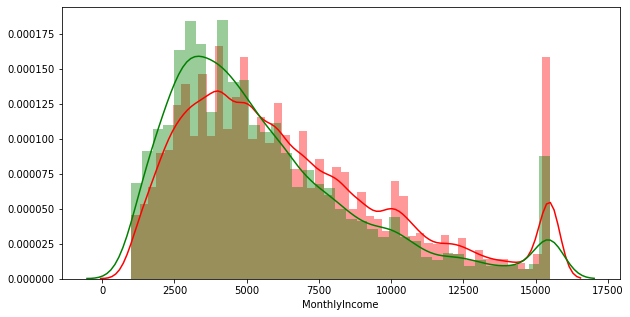

In [37]:
mi0 = df[df['SeriousDlqin2yrs']==0]
mi1 = df[df['SeriousDlqin2yrs']==1]

plt.figure(figsize=(10,5))
sns.distplot(mi0['MonthlyIncome'], color='red')
sns.distplot(mi1['MonthlyIncome'], color='green')
plt.show()

In [38]:
# creating categories for defaulters, based on monthly income

q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.5)
q3 = df['MonthlyIncome'].quantile(0.75)

def mi_cat(mi):
    if mi<=q1:
        return 1
    elif q1<mi<=q2:
        return 2
    elif q2<mi<=q3:
        return 3
    else:
        return 4

In [39]:
df['mi_cat'] = df['MonthlyIncome'].apply(mi_cat)

In [40]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,mi_cat
0,1,0.766127,45.0,0.802982,9120.0,13,6,2.0,4
1,0,0.957151,40.0,0.121876,2600.0,4,0,1.0,1
2,0,0.658180,38.0,0.085113,3042.0,2,0,0.0,1
3,0,0.233810,30.0,0.036050,3300.0,5,0,0.0,1
4,0,0.907239,49.0,0.024926,15500.0,7,1,0.0,4


In [41]:
df.groupby('mi_cat')['MonthlyIncome'].agg(['min','max'])

,min,max
mi_cat,,
1,1000.0,3600.0
2,3601.0,5500.0
3,5501.0,8333.0
4,8334.0,15500.0


In [42]:
ct = pd.crosstab(df['SeriousDlqin2yrs'], df['mi_cat'], normalize='columns').T

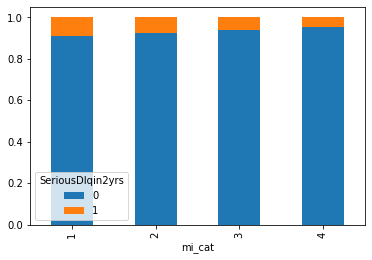

In [43]:
ct.plot.bar(stacked=True)
plt.show()

The chart shows that default rate is approximately same for the highest two categories of income.

Default rate is highest for the lowest income category.

**RevolvingUtilizationOfUnsecuredLines and monthly Income**

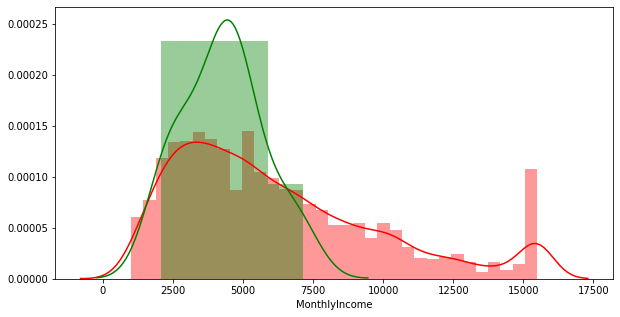

In [44]:
mi0 = df[df['RevolvingUtilizationOfUnsecuredLines']==0]
mi1 = df[df['RevolvingUtilizationOfUnsecuredLines']==1]

plt.figure(figsize=(10,5))
sns.distplot(mi0['MonthlyIncome'], color='red')
sns.distplot(mi1['MonthlyIncome'], color='green')
plt.show()

In [45]:
# creating categories for defaulters, based on monthly income

q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.5)
q3 = df['MonthlyIncome'].quantile(0.75)

def ruul_cat(mi):
    if mi<=q1:
        return 1
    elif q1<mi<=q2:
        return 2
    elif q2<mi<=q3:
        return 3
    else:
        return 4

In [46]:
df['ruul_cat'] = df['MonthlyIncome'].apply(ruul_cat)

In [47]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,mi_cat,ruul_cat
0,1,0.766127,45.0,0.802982,9120.0,13,6,2.0,4,4
1,0,0.957151,40.0,0.121876,2600.0,4,0,1.0,1,1
2,0,0.658180,38.0,0.085113,3042.0,2,0,0.0,1,1
3,0,0.233810,30.0,0.036050,3300.0,5,0,0.0,1,1
4,0,0.907239,49.0,0.024926,15500.0,7,1,0.0,4,4


In [48]:
df.groupby('ruul_cat')['MonthlyIncome'].agg(['min','max'])

,min,max
ruul_cat,,
1,1000.0,3600.0
2,3601.0,5500.0
3,5501.0,8333.0
4,8334.0,15500.0


In [49]:
ct = pd.crosstab(df['SeriousDlqin2yrs'], df['ruul_cat'], normalize='columns').T

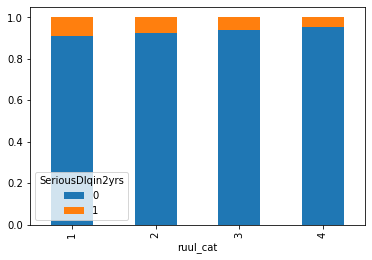

In [50]:
ct.plot.bar(stacked=True)
plt.show()

### Visualization using Decision Tree

In [51]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfDependents                      150000 non-null float64
mi_cat                                  150000 non-null int64
ruul_cat                                150000 non-null int64
dtypes: float64(5), int64(5)
memory usage: 11.4 MB


We will drop variables created by us like, mi_cat and ruul_cat

In [52]:
df1 = df1.drop(['mi_cat','ruul_cat'], axis = 1)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfDependents                      150000 non-null float64
dtypes: float64(5), int64(3)
memory usage: 9.2 MB


In [54]:
y = df1['SeriousDlqin2yrs']
X = df1.drop('SeriousDlqin2yrs', axis=1)

In [55]:
X.shape

(150000, 7)

In [56]:
y.shape

(150000,)

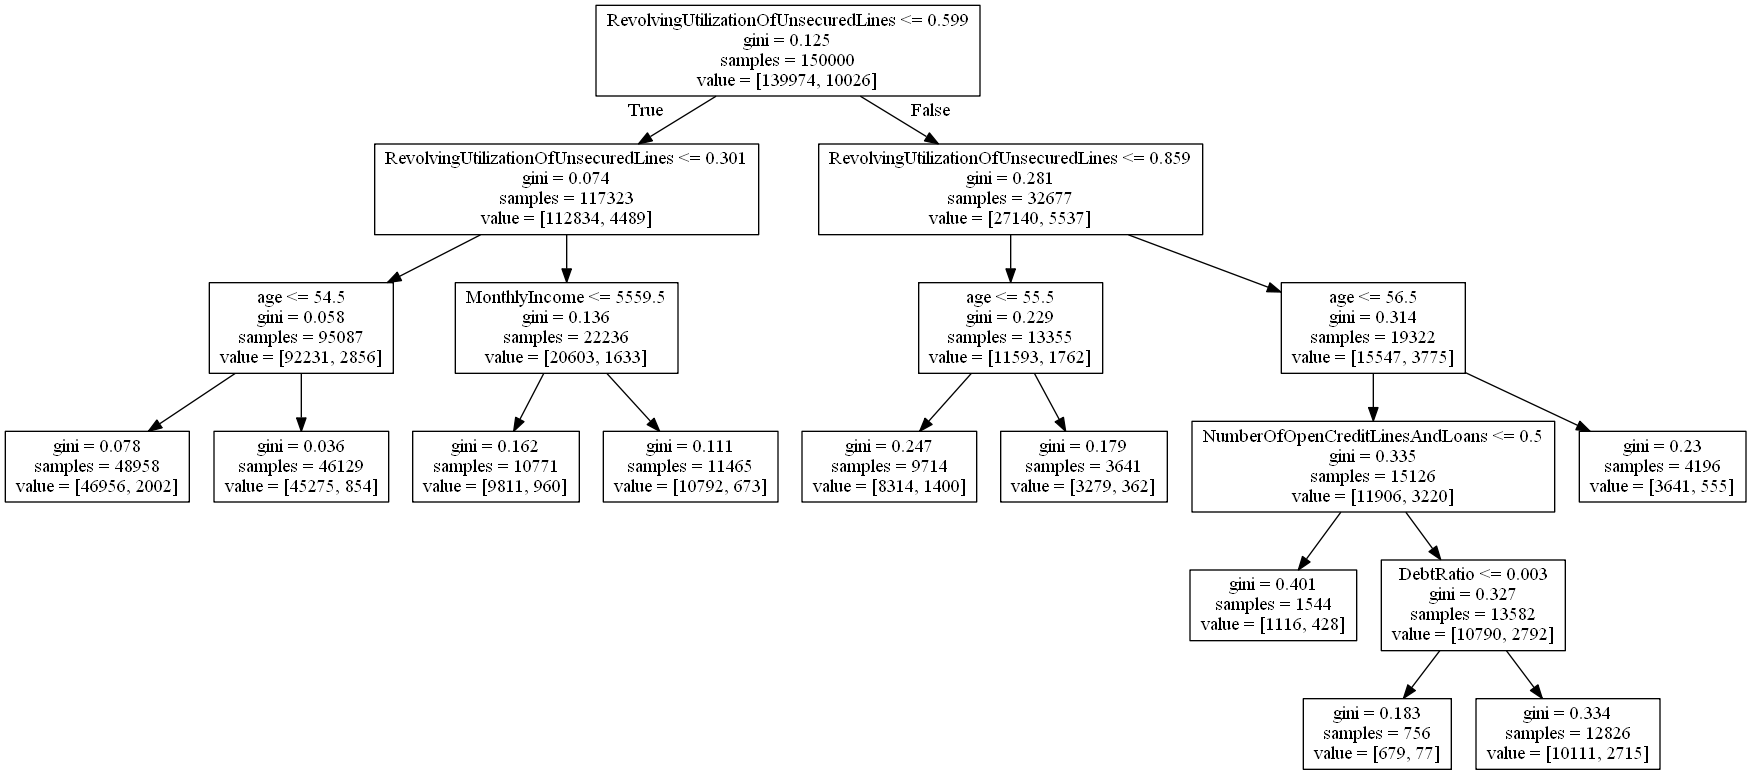

In [57]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1, max_depth=5, max_leaf_nodes=10) 

dtc.fit(X,y)

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dtc, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Model Building (Stats)

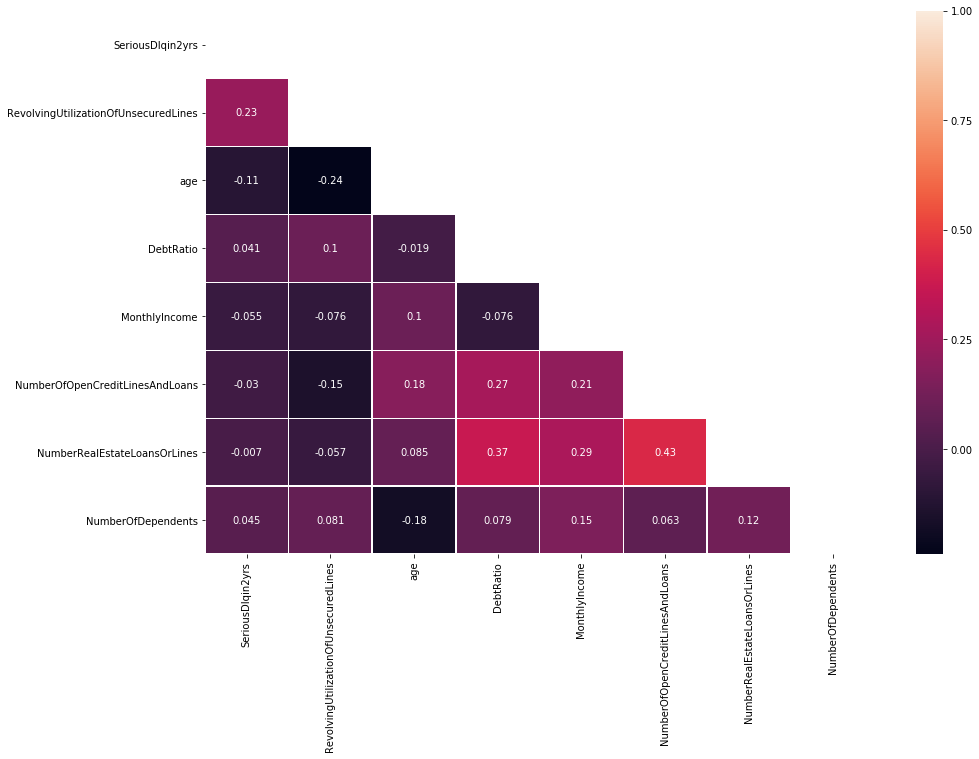

In [58]:
plt.figure(figsize=(15,10))
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask, linewidth=0.5, annot=True)
plt.show()

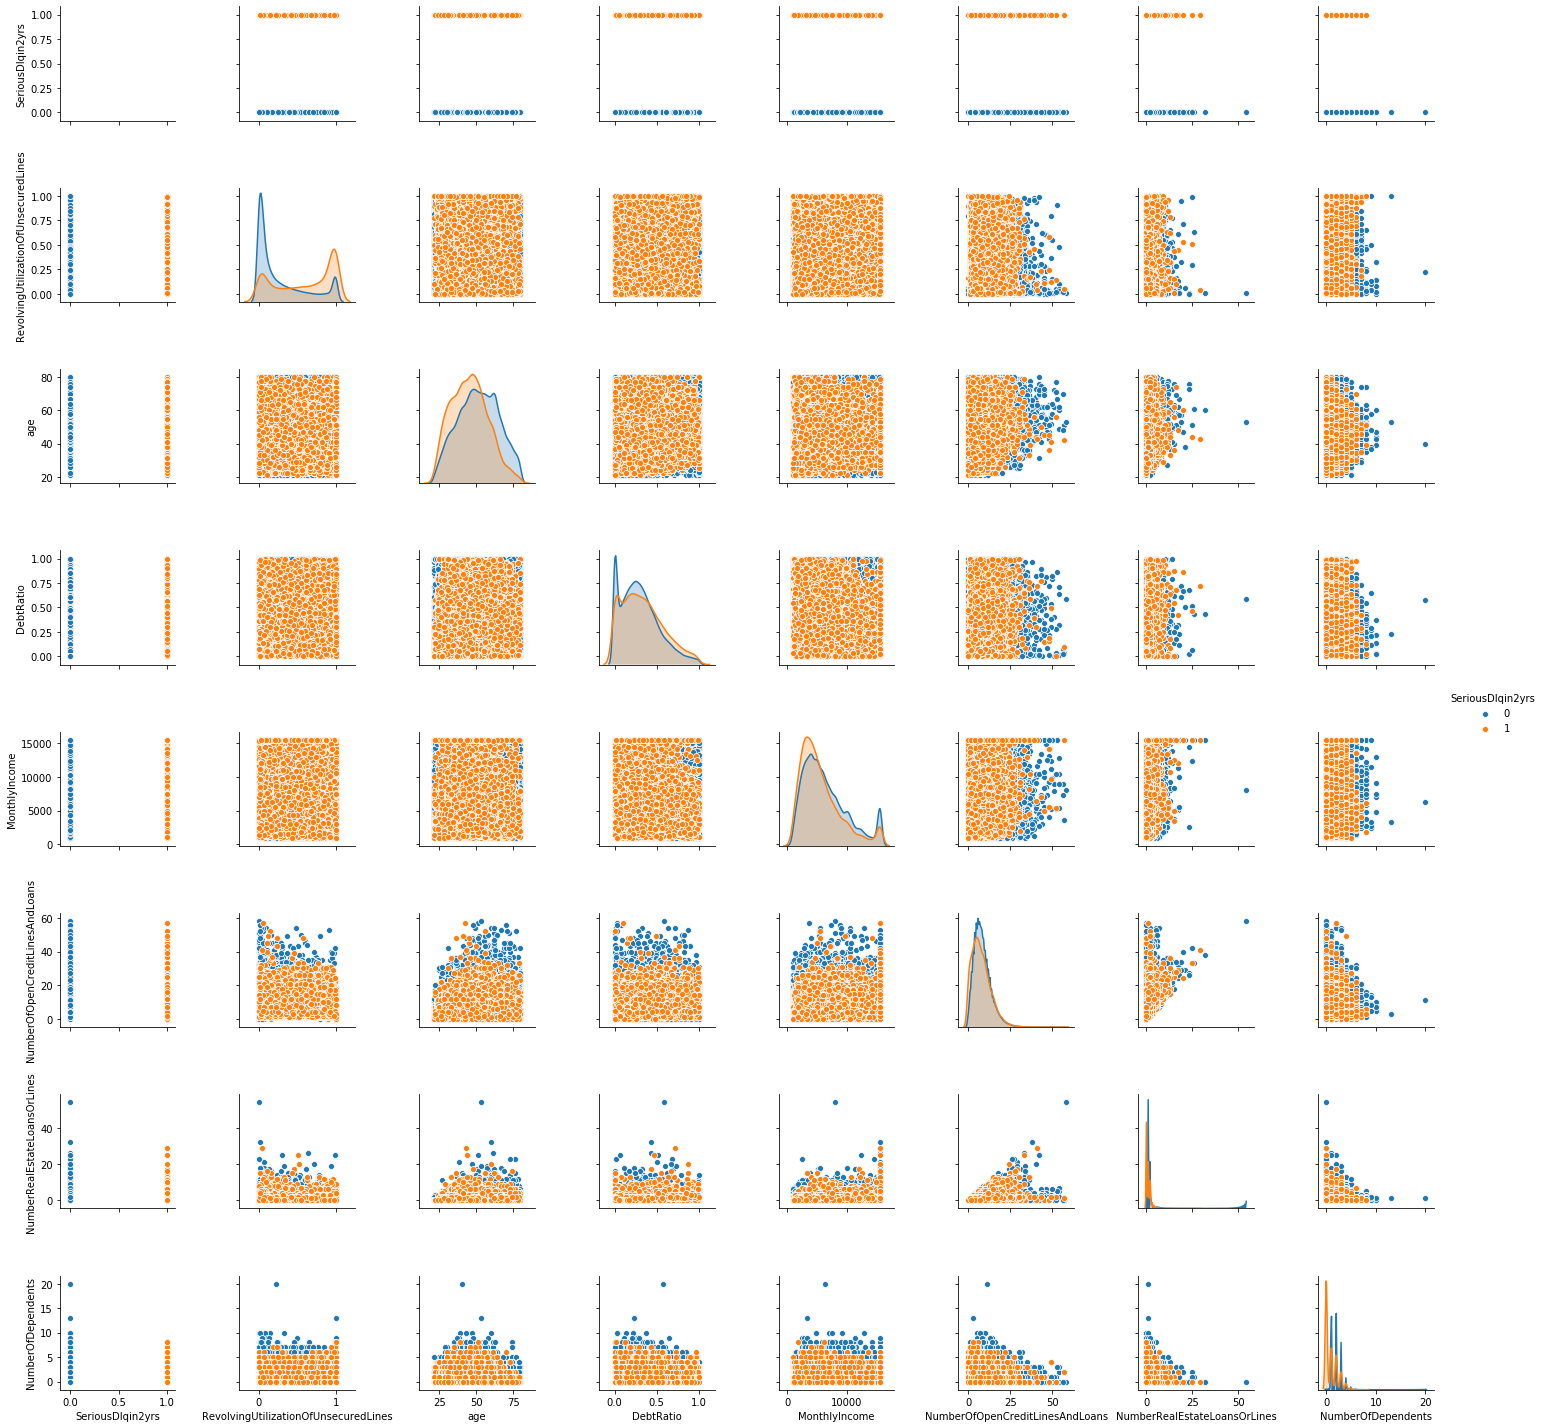

In [59]:
sns.pairplot(data=df1, hue='SeriousDlqin2yrs')
plt.show()

In [60]:
y = df1['SeriousDlqin2yrs']
X = df1.drop('SeriousDlqin2yrs', axis=1)
X = X.assign(const=1)

import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.218678
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149992
Method:                           MLE   Df Model:                            7
Date:                Sun, 26 Jan 2020   Pseudo R-squ.:                  0.1088
Time:                        12:27:12   Log-Likelihood:                -32802.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines     2.2049      0.031     72.104      0.000       2.145       2.265
age                                     -0.0200      0.001    -22.703      0.000      -0.022      -0.018
DebtRatio                                0.2202      0.050      4.368      0.000       0.121       0.319
MonthlyIncome                        -5.208e-05    3.5e-06    -14.892      0.000   -5.89e-05   -4.52e-05
NumberOfOpenCreditLinesAndLoans          0.0226      0.002      9.289      0.000       0.018       0.027
NumberRealEstateLoansOrLines             0.0580      0.010      5.530      0.000       0.037       0.079
NumberOfDependents                       0.0860      0.009      9.552      0.000       0.068       0.104
const                                   -2.6993      0.052    -52.350      0.000      -2.800      -2.598
========================================================================================================
"""

In [61]:
# Check for multi-collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif}, index=X.columns)

,vif
RevolvingUtilizationOfUnsecuredLines,1.098568
age,1.132475
DebtRatio,1.278075
MonthlyIncome,1.186726
NumberOfOpenCreditLinesAndLoans,1.332094
NumberRealEstateLoansOrLines,1.470203
NumberOfDependents,1.082617
const,23.868246


Here, we see that all the features are significant and have no multi-collinearity

In [62]:
logit.params

RevolvingUtilizationOfUnsecuredLines    2.204928
age                                    -0.019958
DebtRatio                               0.220225
MonthlyIncome                          -0.000052
NumberOfOpenCreditLinesAndLoans         0.022610
NumberRealEstateLoansOrLines            0.058013
NumberOfDependents                      0.086006
const                                  -2.699317
dtype: float64

**Interpretation:**

All coef. are significant.

As Age & Monthly Income increases Delinquency decreases.

As RevolvingUtilizationOfUnsecuredLines, DebtRatio, NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines,
NumberOfDependents increases Delinquency increases.

**Log of Odds**

As Age increases by 1, Log(Odds) of Delinquency decreases by 0.019

As Monthly Income increases by 1, Log(Odds) of Delinquency decreases by 0.00052

As RevolvingUtilizationOfUnsecuredLines increases by 1, Log(Odds) of Delinquency increases by 2.20

As DebtRatio increases by 1, Log(Odds) of Delinquency increases by 0.22

As NumberOfOpenCreditLinesAndLoans increases by 1, Log(Odds) of Delinquency increases by 0.022

As NumberRealEstateLoansOrLines increases by 1, Log(Odds) of Delinquency increases by 0.058

As NumberOfDependents increases by 1, Log(Odds) of Delinquency increases by 0.086

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

y_prob = logit.predict(X)

y_pred = y_prob.apply(lambda x: 0 if x<0.3 else 1)
print('\033[1m Confusion Matrix: \033[0m\n',confusion_matrix(y, y_pred))
print('\n \033[1m Classification Report:\033[0m\n',classification_report(y,y_pred))
print('\n \033[1m Predicted values for 1 & 0: \033[0m\n', y_pred.value_counts())

 Confusion Matrix: 
 [[139694    280]
 [  9918    108]]

  Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    139974
           1       0.28      0.01      0.02     10026

    accuracy                           0.93    150000
   macro avg       0.61      0.50      0.49    150000
weighted avg       0.89      0.93      0.90    150000


  Predicted values for 1 & 0: 
 0    149612
1       388
dtype: int64


**ROC Analysis**

In [64]:
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression:",accuracy_score(y, y_pred))

Accuracy of Logistic Regression: 0.9320133333333334


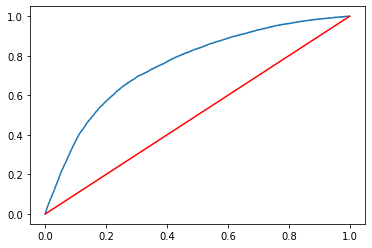

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y,y_prob)

plt.plot(fpr,tpr)
plt.plot(fpr, fpr, '-r')
plt.show()

### Model Building (ML)

In [66]:
y = df1['SeriousDlqin2yrs']
X = df1.drop('SeriousDlqin2yrs', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**Handling inbalanced data**

In [67]:
# Using Oversampling Technique, for handling imbalanced data
Xy_train = pd.concat([X_train,y_train], axis=1)


Xy_train0 = Xy_train.loc[Xy_train['SeriousDlqin2yrs'] == 0]
Xy_train1 = Xy_train.loc[Xy_train['SeriousDlqin2yrs'] == 1]


len1= len(Xy_train1)

len0= len(Xy_train0)


Xy_train1_os= Xy_train1.sample(len1, replace=True)

Xy_train_os = pd.concat([Xy_train1_os, Xy_train0],axis=0)

y_train_os = Xy_train_os['SeriousDlqin2yrs']
X_train_os = Xy_train_os.drop('SeriousDlqin2yrs',axis=1)


In [68]:
X_train = X_train_os
y_train =  y_train_os

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train, y_train)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

from sklearn.metrics import roc_auc_score, accuracy_score

print('Accuracy score of Train:',accuracy_score(y_train, y_train_pred))
print('Accuracy score of Test:',accuracy_score(y_test, y_test_pred))

print('AUC of Train:',roc_auc_score(y_train, y_train_pred))
print('AUC of Test:',roc_auc_score(y_test, y_test_pred))

Accuracy score of Train: 0.9948761904761905
Accuracy score of Test: 0.9320444444444445
AUC of Train: 0.9619107922443194
AUC of Test: 0.5055397253108406


#### Hyperparameter Tuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

param_dist = {
    'n_estimators': sp_randint(5,100),
    'max_depth': sp_randint(2,50),
    'min_samples_split': sp_randint(2,100),
    'min_samples_leaf': sp_randint(2,100)
}

rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist, cv=3, random_state=1)

rand_search.fit(X,y)
print(rand_search.best_params_)

{'max_depth': 39, 'min_samples_leaf': 14, 'min_samples_split': 74, 'n_estimators': 14}


In [70]:
X_train = X_train_os
y_train =  y_train_os

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(**rand_search.best_params_, random_state=1)

rfc.fit(X_train, y_train)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

from sklearn.metrics import roc_auc_score, accuracy_score

print('Accuracy score of Train:',accuracy_score(y_train, y_train_pred))
print('Accuracy score of Test:',accuracy_score(y_test, y_test_pred))

print('AUC of Train:',roc_auc_score(y_train, y_train_pred))
print('AUC of Test:',roc_auc_score(y_test, y_test_pred))

Accuracy score of Train: 0.933047619047619
Accuracy score of Test: 0.9336
AUC of Train: 0.5005683432793407
AUC of Test: 0.5


### Simulation to Estimate Optimal Cutoff

In [71]:
model_gain = []
thresholds = []
y_prob = pd.DataFrame(y_test_prob)

max_p = y_prob.max()[0]

for i in np.linspace(0,max_p,100):
    y_pred = y_prob[0].apply(lambda x: 1 if x>i else 0)
    conf = confusion_matrix(y_test, y_pred)
    tot_benefit = conf[0][0]*1000 + conf[0][1]*(-1000)
    tot_cost = conf[1][0]*15000
    net_gain = tot_benefit - tot_cost
    model_gain.append(net_gain)
    thresholds.append(i)
    
print('Max net Gain =', max(model_gain))

Max net Gain = 5855000


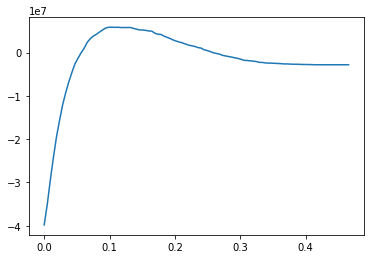

In [72]:
plt.plot(thresholds, model_gain)
plt.show()

In [73]:
# finding the optimal threshold
optimal_idx= np.argmax(model_gain)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold:',optimal_threshold)

Optimal Threshold: 0.10347703782211687


### Scoring the Data (Loan Application)

Here, we will test our model by using new data for prediction.

In [74]:
dfs = pd.read_csv('G:\\My Research\\CSV Files\\gsmc_to_score.csv')
dfs.head()

,Unnamed: 0,ID,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,0,38250,0.689749,38,0.650818,4584.0,13,2,0.0
1,1,13403,1.043621,32,0.025321,5765.0,3,0,1.0
2,2,8615,0.456954,48,0.580222,6400.0,7,2,1.0
3,3,21200,0.368844,52,0.078662,9775.0,8,0,0.0
4,4,100806,0.505278,62,0.414859,6500.0,23,0,2.0


In [75]:
id = dfs[['ID']]

In [76]:
# dropping insignificant columns
dfs = dfs.drop(['Unnamed: 0','ID'], 1)

In [77]:
# performing data cleaning on the test data

dfs.loc[dfs['MonthlyIncome']>15500, 'MonthlyIncome']= 15500
dfs.loc[dfs['MonthlyIncome']<1000, 'MonthlyIncome']=np.NaN
dfs['MonthlyIncome'] = dfs['MonthlyIncome'].fillna(method='ffill')

dfs.loc[dfs['RevolvingUtilizationOfUnsecuredLines']>1, 'RevolvingUtilizationOfUnsecuredLines']=np.NaN
dfs['RevolvingUtilizationOfUnsecuredLines'] = dfs['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill')

dfs.loc[(dfs['age']>80)|(dfs['age']<18), 'age']=np.NaN
dfs['age'] = dfs['age'].fillna(method='ffill')

dfs.loc[dfs['DebtRatio']>1, 'DebtRatio']=np.NaN
dfs['DebtRatio'] = dfs['DebtRatio'].fillna(method='ffill')

dfs['NumberOfDependents'] = dfs['NumberOfDependents'].fillna(method='ffill')


In [78]:
# testing on the new data, checking the probabilities
y_prob_score = rfc.predict_proba(dfs)[:,1]

id['prob'] = y_prob_score

In [79]:
id.head()

,ID,prob
0,38250,0.164948
1,13403,0.136269
2,8615,0.032475
3,21200,0.118319
4,100806,0.053832


In [80]:
# If prabability is less than optimal threshold accept else reject the loan application 
id['approve_reject'] = id['prob'].apply(lambda x: 'approve' if x<optimal_threshold else 'reject')

In [81]:
id.head()

,ID,prob,approve_reject
0,38250,0.164948,reject
1,13403,0.136269,reject
2,8615,0.032475,approve
3,21200,0.118319,reject
4,100806,0.053832,approve


After some time with the help of feedback received, we can train our model again to predict more accurately.